<a href="https://colab.research.google.com/github/aimanuel/JupyterNotebook/blob/main/3_Codility_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
%matplotlib inline

In [ ]:
filename = 'C:\\Users\\Adrian Imanuel\\Google Drive\\13. Python\\Machine Learning\\DataWow\\realest.csv'

In [ ]:
data = pd.read_csv(filename)
data.head()

,Price,Bedroom,Space,Room,Lot,Tax,Bathroom,Garage,Condition
0,53.0,2.0,967.0,5.0,39.0,652.0,1.5,0.0,0.0
1,55.0,2.0,815.0,5.0,33.0,1000.0,1.0,2.0,1.0
2,56.0,3.0,900.0,5.0,35.0,897.0,1.5,1.0,0.0
3,58.0,3.0,1007.0,6.0,24.0,964.0,1.5,2.0,0.0
4,64.0,3.0,1100.0,7.0,50.0,1099.0,1.5,1.5,0.0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Price      156 non-null    float64
 1   Bedroom    156 non-null    float64
 2   Space      146 non-null    float64
 3   Room       156 non-null    float64
 4   Lot        146 non-null    float64
 5   Tax        147 non-null    float64
 6   Bathroom   156 non-null    float64
 7   Garage     156 non-null    float64
 8   Condition  156 non-null    float64
dtypes: float64(9)
memory usage: 11.2 KB


In [ ]:
data.isnull().sum()

Price         1
Bedroom       1
Space        11
Room          1
Lot          11
Tax          10
Bathroom      1
Garage        1
Condition     1
dtype: int64

In [ ]:
data.dropna(inplace=True)

In [ ]:
data.isnull().sum()

Price        0
Bedroom      0
Space        0
Room         0
Lot          0
Tax          0
Bathroom     0
Garage       0
Condition    0
dtype: int64

In [ ]:
data

,Price,Bedroom,Space,Room,Lot,Tax,Bathroom,Garage,Condition
0,53.0,2.0,967.0,5.0,39.0,652.0,1.5,0.0,0.0
1,55.0,2.0,815.0,5.0,33.0,1000.0,1.0,2.0,1.0
2,56.0,3.0,900.0,5.0,35.0,897.0,1.5,1.0,0.0
3,58.0,3.0,1007.0,6.0,24.0,964.0,1.5,2.0,0.0
4,64.0,3.0,1100.0,7.0,50.0,1099.0,1.5,1.5,0.0
...,...,...,...,...,...,...,...,...,...
149,32.0,4.0,1065.0,7.0,25.0,492.0,1.5,0.0,0.0
151,42.0,3.0,585.0,5.0,50.0,713.0,1.0,0.0,0.0
153,43.0,2.0,593.0,4.0,30.0,465.0,2.0,1.0,0.0
154,53.0,3.0,716.0,6.0,30.0,585.0,1.0,2.0,1.0


In [ ]:
data[(data['Bathroom']==2)|(data['Bedroom']==4)].describe(percentiles=None)

,Price,Bedroom,Space,Room,Lot,Tax,Bathroom,Garage,Condition
count,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000
mean,53.324324,3.486486,1090.783784,6.972973,30.324324,765.081081,1.770270,0.635135,0.243243
std,13.220468,0.768173,310.888434,1.117698,6.298386,221.155096,0.401293,0.608375,0.434959
min,32.000000,2.000000,593.000000,4.000000,25.000000,418.000000,1.000000,0.000000,0.000000
25%,44.000000,3.000000,897.000000,7.000000,25.000000,584.000000,1.500000,0.000000,0.000000
50%,51.000000,4.000000,1053.000000,7.000000,30.000000,725.000000,2.000000,1.000000,0.000000
75%,64.000000,4.000000,1137.000000,7.000000,30.000000,941.000000,2.000000,1.000000,0.000000
max,82.000000,4.000000,2104.000000,9.000000,50.000000,1287.000000,2.500000,2.000000,1.000000


In [ ]:
# ANSWER
data[(data['Bathroom']==2)|(data['Bedroom']==4)].describe().transpose().drop(['25%','75%','count'],axis=1)

,mean,std,min,50%,max
Price,53.324324,13.220468,32.0,51.0,82.0
Bedroom,3.486486,0.768173,2.0,4.0,4.0
Space,1090.783784,310.888434,593.0,1053.0,2104.0
Room,6.972973,1.117698,4.0,7.0,9.0
Lot,30.324324,6.298386,25.0,30.0,50.0
Tax,765.081081,221.155096,418.0,725.0,1287.0
Bathroom,1.770270,0.401293,1.0,2.0,2.5
Garage,0.635135,0.608375,0.0,1.0,2.0
Condition,0.243243,0.434959,0.0,0.0,1.0


In [ ]:
## ANSWER
data[data['Space']>800].sort_values('Price',ascending=False)

,Price,Bedroom,Space,Room,Lot,Tax,Bathroom,Garage,Condition
114,90.0,8.0,2293.0,12.0,50.0,1181.0,3.0,2.0,0.0
36,88.0,8.0,2278.0,12.0,50.0,1183.0,3.0,2.0,0.0
140,88.0,7.0,2277.0,12.0,50.0,1248.0,3.0,2.0,0.0
88,88.0,8.0,2228.0,12.0,50.0,1208.0,3.0,2.0,0.0
62,85.0,7.0,2295.0,12.0,50.0,1233.0,3.0,2.0,0.0
...,...,...,...,...,...,...,...,...,...
19,35.0,4.0,1137.0,7.0,25.0,561.0,1.5,0.0,0.0
45,35.0,5.0,1142.0,7.0,25.0,543.0,1.5,0.0,0.0
71,34.0,4.0,1095.0,7.0,25.0,530.0,1.5,0.0,0.0
97,34.0,4.0,1087.0,7.0,25.0,584.0,1.5,0.0,0.0


In [ ]:
type(data['Lot'].quantile(4/5))

numpy.float64

In [ ]:
## Answer
data[data['Lot']>data['Lot'].quantile(4/5)]

,Price,Bedroom,Space,Room,Lot,Tax,Bathroom,Garage,Condition
4,64.0,3.0,1100.0,7.0,50.0,1099.0,1.5,1.5,0.0
9,82.0,4.0,2104.0,9.0,40.0,1038.0,2.5,1.0,1.0
10,85.0,8.0,2240.0,12.0,50.0,1200.0,3.0,2.0,0.0
14,56.0,4.0,1325.0,8.0,50.0,1287.0,1.5,0.0,0.0
30,62.0,3.0,1124.0,7.0,50.0,1129.0,1.5,1.5,0.0
35,81.0,5.0,2173.0,9.0,40.0,1074.0,2.5,1.0,1.0
36,88.0,8.0,2278.0,12.0,50.0,1183.0,3.0,2.0,0.0
40,55.0,5.0,1255.0,8.0,50.0,1278.0,1.5,0.0,0.0
47,42.0,2.0,539.0,5.0,50.0,721.0,1.0,0.0,0.0
61,84.0,3.0,2171.0,9.0,40.0,1075.0,2.5,1.0,1.0


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
data.columns

Index(['Price', 'Bedroom', 'Space', 'Room', 'Lot', 'Tax', 'Bathroom', 'Garage',
       'Condition'],
      dtype='object')

In [ ]:
X = data.drop('Price',axis=1)
y = data['Price']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
lm = LinearRegression()

In [ ]:
lm.fit(X_train,y_train)

LinearRegression()

In [ ]:
lm.intercept_

19.18980914638655

In [ ]:
list(lm.coef_)

[-3.23610562974219,
 0.013015501594142853,
 1.093385962946433,
 0.4270405806388263,
 0.0007883283581730661,
 4.768145848827374,
 4.538741466395259,
 1.2434969624441914]

In [ ]:
a = ['coef1','coef2','coef3','coef4','coef5','coef6','coef7','coef8']

In [ ]:
b = list(lm.coef_)

In [ ]:
coef_dict = dict(zip(a, b))

In [ ]:
coef_dict

{'coef1': -3.23610562974219,
 'coef2': 0.013015501594142853,
 'coef3': 1.093385962946433,
 'coef4': 0.4270405806388263,
 'coef5': 0.0007883283581730661,
 'coef6': 4.768145848827374,
 'coef7': 4.538741466395259,
 'coef8': 1.2434969624441914}

In [ ]:
d = {'Intercept':lm.intercept_}

In [ ]:
# answer
x = {**d, **coef_dict}

In [ ]:
x

{'Intercept': 19.18980914638655,
 'coef1': -3.23610562974219,
 'coef2': 0.013015501594142853,
 'coef3': 1.093385962946433,
 'coef4': 0.4270405806388263,
 'coef5': 0.0007883283581730661,
 'coef6': 4.768145848827374,
 'coef7': 4.538741466395259,
 'coef8': 1.2434969624441914}

In [ ]:
predictions = lm.predict(X_test)

Text(0, 0.5, 'y test (True Values)')

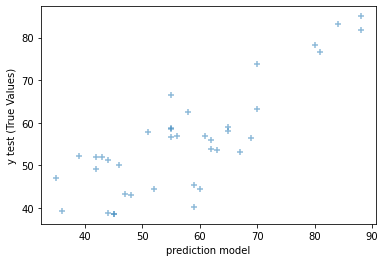

In [ ]:
plt.scatter(x=y_test,y=predictions,marker='+',alpha=0.5)

plt.xlabel('prediction model')
plt.ylabel('y test (True Values)')

In [ ]:
from sklearn import metrics

In [ ]:
print('MAE: ', metrics.mean_absolute_error(y_test,predictions))
print('MSE: ', metrics.mean_squared_error(y_test,predictions))
print('RMSE: ', np.sqrt(metrics.mean_squared_error(y_test,predictions)))

MAE:  7.046464120582616
MSE:  67.17140333974594
RMSE:  8.19581620949042


In [ ]:
metrics.explained_variance_score(y_test,predictions)

0.6661453718475125

In [ ]:
3 bedrooms
1500 sqft space
8 rooms
40 lot
1000 tax
2 bathrooms
1 garage
0 condition


In [ ]:
data[:1]

,Price,Bedroom,Space,Room,Lot,Tax,Bathroom,Garage,Condition
0,53.0,2.0,967.0,5.0,39.0,652.0,1.5,0.0,0.0


In [ ]:
test = {'Bedroom':3,'Space':1500,
                     'Room':8,'Lot':40,
                     'Tax':1000,'Bathroom':2,
                     'Garage':1,'Condition':0}

In [ ]:
predict_test = lm.predict(test.reshape(1,1))

AttributeError: 'dict' object has no attribute 'reshape'

In [ ]:
test = pd.DataFrame({'Bedroom':3,'Space':1500,
                     'Room':8,'Lot':40,
                     'Tax':1000,'Bathroom':2,
                     'Garage':1,'Condition':0},index=[0])

In [ ]:
predict_test = lm.predict(test)

In [ ]:
## Answer
predict_test

array([69.6968171])

In [ ]:
print(predict_test[0])

69.69681709972186


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [ ]:
class RealestDF():

    def  __init__(self,source):
        self.df = pd.read_csv(source)
        self.dropna = self.df.dropna(inplace=True)
        
    def cust_describe(self,bathroom,bedroom):
        return self.df[(self.df['Bathroom']==int(bathroom))|(self.df['Bedroom']==int(bedroom))].describe().transpose().drop(['25%','75%','count'],axis=1)
    
    def greater_space(self,spacegreater):
        return self.df[self.df['Space']>int(spacegreater)].sort_values('Price',ascending=False)
    
    def n_5th_quantile(self,n):
        return self.df[self.df['Lot']>self.df['Lot'].quantile(int(n)/5)]
    
    def coef(self):
        X = self.df.drop('Price',axis=1)
        y = self.df['Price']
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)
        lm = LinearRegression()
        lm.fit(X_train,y_train)
        a = ['coef1','coef2','coef3','coef4','coef5','coef6','coef7','coef8']
        b = list(lm.coef_)
        coef_dict = dict(zip(a, b))
        d = {'Intercept':lm.intercept_}
        return {**d, **coef_dict}
    
    def predicting(self,Bedroom,Space,Room,Lot,Tax,Bathroom,Garage,Condition):
        test = pd.DataFrame({'Bedroom':int(Bedroom),'Space':int(Space),
                             'Room':int(Room),'Lot':int(Lot),'Tax':int(Tax),
                             'Bathroom':int(Bathroom),'Garage':int(Garage),
                             'Condition':int(Condition)},index=[0])
        return lm.predict(test)[0]
        

In [ ]:
test = RealestDF(source=filename)

In [ ]:
test.cust_describe(bathroom=2,bedroom=4)

,mean,std,min,50%,max
Price,53.324324,13.220468,32.0,51.0,82.0
Bedroom,3.486486,0.768173,2.0,4.0,4.0
Space,1090.783784,310.888434,593.0,1053.0,2104.0
Room,6.972973,1.117698,4.0,7.0,9.0
Lot,30.324324,6.298386,25.0,30.0,50.0
Tax,765.081081,221.155096,418.0,725.0,1287.0
Bathroom,1.770270,0.401293,1.0,2.0,2.5
Garage,0.635135,0.608375,0.0,1.0,2.0
Condition,0.243243,0.434959,0.0,0.0,1.0


In [ ]:
a = test.cust_describe(bathroom=2,bedroom=4).values.tolist()

In [ ]:
a

[[53.32432432432432, 13.220468251192193, 32.0, 51.0, 82.0],
 [3.4864864864864864, 0.7681732162019776, 2.0, 4.0, 4.0],
 [1090.7837837837837, 310.888434359689, 593.0, 1053.0, 2104.0],
 [6.972972972972973, 1.1176981923798792, 4.0, 7.0, 9.0],
 [30.324324324324323, 6.29838627504456, 25.0, 30.0, 50.0],
 [765.081081081081, 221.15509620304155, 418.0, 725.0, 1287.0],
 [1.7702702702702702, 0.40129295537803317, 1.0, 2.0, 2.5],
 [0.6351351351351351, 0.6083749831478282, 0.0, 1.0, 2.0],
 [0.24324324324324326, 0.43495883620083997, 0.0, 0.0, 1.0]]

In [ ]:
test.greater_space(spacegreater=800)

,Price,Bedroom,Space,Room,Lot,Tax,Bathroom,Garage,Condition
114,90.0,8.0,2293.0,12.0,50.0,1181.0,3.0,2.0,0.0
36,88.0,8.0,2278.0,12.0,50.0,1183.0,3.0,2.0,0.0
140,88.0,7.0,2277.0,12.0,50.0,1248.0,3.0,2.0,0.0
88,88.0,8.0,2228.0,12.0,50.0,1208.0,3.0,2.0,0.0
62,85.0,7.0,2295.0,12.0,50.0,1233.0,3.0,2.0,0.0
...,...,...,...,...,...,...,...,...,...
19,35.0,4.0,1137.0,7.0,25.0,561.0,1.5,0.0,0.0
45,35.0,5.0,1142.0,7.0,25.0,543.0,1.5,0.0,0.0
71,34.0,4.0,1095.0,7.0,25.0,530.0,1.5,0.0,0.0
97,34.0,4.0,1087.0,7.0,25.0,584.0,1.5,0.0,0.0


In [ ]:
test.n_5th_quantile(n=4)

,Price,Bedroom,Space,Room,Lot,Tax,Bathroom,Garage,Condition
4,64.0,3.0,1100.0,7.0,50.0,1099.0,1.5,1.5,0.0
9,82.0,4.0,2104.0,9.0,40.0,1038.0,2.5,1.0,1.0
10,85.0,8.0,2240.0,12.0,50.0,1200.0,3.0,2.0,0.0
14,56.0,4.0,1325.0,8.0,50.0,1287.0,1.5,0.0,0.0
30,62.0,3.0,1124.0,7.0,50.0,1129.0,1.5,1.5,0.0
35,81.0,5.0,2173.0,9.0,40.0,1074.0,2.5,1.0,1.0
36,88.0,8.0,2278.0,12.0,50.0,1183.0,3.0,2.0,0.0
40,55.0,5.0,1255.0,8.0,50.0,1278.0,1.5,0.0,0.0
47,42.0,2.0,539.0,5.0,50.0,721.0,1.0,0.0,0.0
61,84.0,3.0,2171.0,9.0,40.0,1075.0,2.5,1.0,1.0


In [ ]:
test.coef()

{'Intercept': 19.18980914638655,
 'coef1': -3.23610562974219,
 'coef2': 0.013015501594142853,
 'coef3': 1.093385962946433,
 'coef4': 0.4270405806388263,
 'coef5': 0.0007883283581730661,
 'coef6': 4.768145848827374,
 'coef7': 4.538741466395259,
 'coef8': 1.2434969624441914}

In [ ]:
test.predicting(Bedroom=3,Space=1500,Room=8,Lot=40,Tax=1000,Bathroom=2,Garage=1,Condition=0)

69.69681709972186

# ANSWER IS HERE

In [ ]:
path = 'C:\\Users\\Adrian Imanuel\\Google Drive\\13. Python\\Machine Learning\\DataWow\\realest.csv'

In [ ]:
class AnalysisDataAndFitLinearRegression:

    def __init__(self):
        self.version = 1

    def analyse_and_fit_lrm(self, path):
        # a path to a dataset is "./data/realest.csv"
        # dataset can be loaded by uncommenting the line bellow
        data = pd.read_csv(path)
        model_parameters = {}
        price_prediction = {}

        return {
            'model_parameters': model_parameters,
            'price_prediction': price_prediction
        }

    def __listwise_deletion(self, data: pd.DataFrame):
        return data.dropna()


In [ ]:
class AnalysisDataAndFitLinearRegression:

    def __init__(self):
        self.version = 1
        

    def analyse_and_fit_lrm(self, path):
        # a path to a dataset is "./data/realest.csv"
        # dataset can be loaded by uncommenting the line bellow
        data = pd.read_csv(path)
        data = data.dropna()

        summary_dict = {}
        regression_dict = {}

        a = data[(data['Bathroom']==2)|(data['Bedroom']==4)].describe().transpose().drop(['25%','75%','count'],axis=1)
        a = a.values.tolist()
        
        b = data[data['Space']>800].sort_values('Price',ascending=False)
        
        c = data[data['Lot']>data['Lot'].quantile(4/5)]

        summary_dict = {'statistics':a,'data_frame':b,'number_of_observations':c}

        model_parameters = {}
        price_prediction = {}

        X = data.drop('Price',axis=1)
        y = data['Price']
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)
        lm = LinearRegression()
        lm.fit(X_train,y_train)
        a = ['coef1','coef2','coef3','coef4','coef5','coef6','coef7','coef8']
        b = list(lm.coef_)
        coef_dict = dict(zip(a, b))
        d = {'Intercept':lm.intercept_}
        e = {**d, **coef_dict}
        model_parameters = {'model_parameters':e}

        test = pd.DataFrame({'Bedroom':3,'Space':1500,
                             'Room':8,'Lot':40,'Tax':1000,
                             'Bathroom':2,'Garage':1,
                             'Condition':0},index=[0])
        price_prediction = {'price_prediction':lm.predict(test)[0]}

        regression_dict = {**model_parameters, **price_prediction}
        
        return {
            'summary_dict': summary_dict,
            'regression_dict': regression_dict
        }

    def __listwise_deletion(self, data: pd.DataFrame):
        return data.dropna()


In [ ]:
a = AnalysisDataAndFitLinearRegression()

In [ ]:
a.analyse_and_fit_lrm(path)

{'summary_dict': {'statistics': [[53.32432432432432,
    13.220468251192193,
    32.0,
    51.0,
    82.0],
   [3.4864864864864864, 0.7681732162019776, 2.0, 4.0, 4.0],
   [1090.7837837837837, 310.888434359689, 593.0, 1053.0, 2104.0],
   [6.972972972972973, 1.1176981923798792, 4.0, 7.0, 9.0],
   [30.324324324324323, 6.29838627504456, 25.0, 30.0, 50.0],
   [765.081081081081, 221.15509620304155, 418.0, 725.0, 1287.0],
   [1.7702702702702702, 0.40129295537803317, 1.0, 2.0, 2.5],
   [0.6351351351351351, 0.6083749831478282, 0.0, 1.0, 2.0],
   [0.24324324324324326, 0.43495883620083997, 0.0, 0.0, 1.0]],
  'data_frame':      Price  Bedroom   Space  Room   Lot     Tax  Bathroom  Garage  Condition
  114   90.0      8.0  2293.0  12.0  50.0  1181.0       3.0     2.0        0.0
  36    88.0      8.0  2278.0  12.0  50.0  1183.0       3.0     2.0        0.0
  140   88.0      7.0  2277.0  12.0  50.0  1248.0       3.0     2.0        0.0
  88    88.0      8.0  2228.0  12.0  50.0  1208.0       3.0     2.0

In [ ]:
len(a.analyse_and_fit_lrm(path))

2

In [ ]:
a = {'z':1}
b = {'x':2}

In [ ]:
c = {**a, **b}

In [ ]:
c

{'z': 1, 'x': 2}

In [ ]:
select distinct t1.name
from participation t1 join
     participation t1_1
     on t1.name = t1_1.name and
        t1.year = t1_1.year + 1 join
     participation t1_2
     on t1.name = t1_2.name and
        t1.year = t1_2.year + 2;
        
https://stackoverflow.com/questions/64572373/sql-display-name-id-from-consecutive-occurrences-of-values-in-a-table